I tried to analyze the available data, understand which of them have the greatest impact on the occurrence of symptoms and make my prediction.

In [26]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, log_loss
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

warnings.filterwarnings('ignore')

In [27]:
random_state = 42
test_size = 0.2

In [29]:
data = data.rename(columns={'BD ': 'BD', 'FD ': 'FD', })
data.Class.value_counts().to_frame()

,Class
0,509
1,108


In [30]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [31]:
data.drop('Id', axis=1).phik_matrix()

interval columns not set, guessing: ['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD', 'BN', 'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB', 'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD', 'FE', 'FI', 'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class']


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
AB,1.000000,0.753367,0.699143,0.508287,0.709674,0.650455,0.000000,0.284213,0.884649,0.665523,0.163566,0.781940,0.253825,0.388910,0.755437,0.486909,0.848252,0.822822,0.597399,0.860673,0.000000,0.292214,0.252156,0.260308,0.000000,0.223133,0.000000,0.653683,0.281878,0.574481,0.000000,0.448724,0.000000,0.000000,0.000000,0.610448,0.000000,0.371880,0.059080,0.149433,0.129116,0.000000,0.000000,0.341941,0.000000,0.000000,0.000000,0.468587,0.000000,0.000000,0.678855,0.137660,0.000000,0.508628,0.000000,0.000000,0.367243
AF,0.753367,1.000000,0.000000,0.512249,0.000000,0.606279,0.137134,0.652128,0.000000,0.000000,0.163840,0.631314,0.259504,0.000000,0.000000,0.311084,0.181404,0.665591,0.283603,0.401439,0.000000,0.318495,0.000000,0.369841,0.000000,0.140639,0.000000,0.000000,0.000000,0.599696,0.000000,0.557971,0.670316,0.000000,0.000000,0.301886,0.000000,0.272296,0.727411,0.210772,0.139872,0.000000,0.000000,0.000000,0.621363,0.090452,0.058049,0.475110,0.000000,0.000000,0.000000,0.000000,0.000000,0.596100,0.182766,0.000000,0.398307
AH,0.699143,0.000000,1.000000,0.325142,0.661988,0.000000,0.000000,0.000000,0.737105,0.827118,0.184033,0.467911,0.276725,0.000000,0.934729,0.496895,0.635894,0.313257,0.472809,0.834730,0.856355,0.526134,0.639941,0.282180,0.235501,0.661561,0.302206,0.000000,0.605077,0.362707,0.000000,0.000000,0.000000,0.655818,0.000000,0.919555,0.443366,0.000000,0.000000,0.072811,0.163349,0.659022,0.000000,0.832759,0.000000,0.000000,0.047402,0.000000,0.000000,0.000000,0.829970,0.092571,0.000000,0.195763,0.000000,0.451839,0.149563
AM,0.508287,0.512249,0.325142,1.000000,0.492097,0.362346,0.296804,0.437901,0.402889,0.348093,0.000000,0.346313,0.285170,0.000000,0.828676,0.000000,0.450030,0.308670,0.405219,0.344323,0.000000,0.210379,0.000000,0.000000,0.000000,0.236574,0.000000,0.255451,0.241297,0.529763,0.000000,0.140261,0.000000,0.000000,0.000000,0.168061,0.000000,0.000000,0.000000,0.110628,0.000000,0.000000,0.000000,0.000000,0.000000,0.179524,0.379437,0.308598,0.000000,0.000000,0.300683,0.000000,0.000000,0.275159,0.385412,0.000000,0.248135
AR,0.709674,0.000000,0.661988,0.492097,1.000000,0.000000,0.000000,0.348807,0.000000,0.000000,0.088287,0.285114,0.180268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.829324,0.662218,0.162584,0.871936,0.122310,0.286184,0.682605,0.387527,0.647056,0.728398,0.713447,0.000000,0.000000,0.000000,0.861954,0.000000,0.642325,0.439393,0.000000,0.000000,0.000000,0.174188,0.865361,0.000000,0.000000,0.000000,0.082313,0.000000,0.564146,0.000000,0.000000,0.023592,0.000000,0.124881,0.215672,0.364363,0.425023,0.134818
AX,0.650455,0.606279,0.000000,0.362346,0.000000,1.000000,0.000000,0.400145,0.032189,0.190030,0.040066,0.821051,0.134912,0.000000,0.320846,0.134382,0.342924,0.480312,0.219530,0.303752,0.329702,0.406549,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300832,0.037251,0.439030,0.000000,0.129804,0.000000,0.357657,0.000000,0.603009,0.000000,0.085180,0.000000,0.000000,0.000000,0.582210,0.000000,0.000000,0.000000,0.118480,0.000000,0.000000,0.444732,0.120150,0.104806,0.679987,0.104624,0.000000,0.140792
AY,0.000000,0.137134,0.000000,0.296804,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.068138,0.000000,0.096116,0.000000,1.000000,0.000000,0.000000,0.000000,0.082427,0.191481,0.000000,0.138158,0.000000,0.374091,0.507859,0.075648,0.000000,0.000000,0.000000,0.433332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.867889,0.000000,0.000000,0.000000
AZ,0.284213,0.652128,0.000000,0.437901,0.348807,0.400145,0.000000,1.000000,0.000000,0.104532,0.042837,0.481247,0.150715,0.000000,0.000000,0.177729,0.152475,0.000000,0.115570,0.257301,0.269580,0.000000,0.302513,0.0

It can be seen that some features correlate quite strongly with the target, but with which class?

In [32]:
data = data.dropna()
X = data.drop(['Id', 'Class', 'EJ'], axis=1)
y = data.Class

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size,
                                                     random_state=random_state)

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)
col = scaler.get_feature_names_out(X_train.columns)
X_train = pd.DataFrame(scaler.transform(X_train), columns=col,
    index=X_train.index)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns=col,
    index=X_valid.index)

In [35]:
index = []
scores = {"Log Loss": []}
scoring = ["neg_log_loss"]

In [36]:
dummy_clf = DummyClassifier(strategy="most_frequent")

index += ["Dummy classifier"]
cv_result = cross_validate(dummy_clf, X_train, y_train, scoring=scoring)
scores["Log Loss"].append(cv_result['test_neg_log_loss'].mean())
df_scores = pd.DataFrame(scores, index=index)
df_scores

,Log Loss
Dummy classifier,-6.912133


In [37]:
lr_clf = LogisticRegression(max_iter=1000)
index += ["Logistic regression"]
cv_result = cross_validate(lr_clf, X_train, y_train, scoring=scoring)
scores["Log Loss"].append(cv_result['test_neg_log_loss'].mean())
df_scores = pd.DataFrame(scores, index=index)
df_scores

,Log Loss
Dummy classifier,-6.912133
Logistic regression,-0.384008


In [38]:
rf_clf = RandomForestClassifier(random_state=random_state, n_jobs=2)
index += ["Random forest"]
cv_result = cross_validate(rf_clf, X_train, y_train, scoring=scoring)
scores["Log Loss"].append(cv_result['test_neg_log_loss'].mean())
df_scores = pd.DataFrame(scores, index=index)
df_scores

,Log Loss
Dummy classifier,-6.912133
Logistic regression,-0.384008
Random forest,-0.253825


In [39]:
lgbm_clf = LGBMClassifier(random_state=random_state, n_jobs=2)
index += ["LGBM"]
cv_result = cross_validate(lgbm_clf, X_train, y_train, scoring=scoring)
scores["Log Loss"].append(cv_result['test_neg_log_loss'].mean())
df_scores = pd.DataFrame(scores, index=index)
df_scores

,Log Loss
Dummy classifier,-6.912133
Logistic regression,-0.384008
Random forest,-0.253825
LGBM,-0.241014


In [40]:
cat_clf = CatBoostClassifier(random_state=random_state, verbose=0)
index += ["CatBoost"]
cv_result = cross_validate(cat_clf, X_train, y_train, scoring=scoring)
scores["Log Loss"].append(cv_result['test_neg_log_loss'].mean())
df_scores = pd.DataFrame(scores, index=index)
df_scores

,Log Loss
Dummy classifier,-6.912133
Logistic regression,-0.384008
Random forest,-0.253825
LGBM,-0.241014
CatBoost,-0.201825


In [41]:
score = make_scorer(log_loss, greater_is_better=False)

In [42]:
model = CatBoostClassifier(random_state=random_state, verbose=0)
parametrs = {'max_depth': [5, 10],
            'n_estimators': [10, 310]}
grid = GridSearchCV(model, parametrs, scoring=score)
grid.fit(X_train, y_train)
probs = grid.best_estimator_.predict_proba(X_valid)
print(probs[:,0].mean(), probs[:,1].mean())
print(log_loss(y_valid, probs))

0.899216564673197 0.10078343532680302
0.2664441897561883


Let's look at the reaction of the log loss when the composition of features changes.

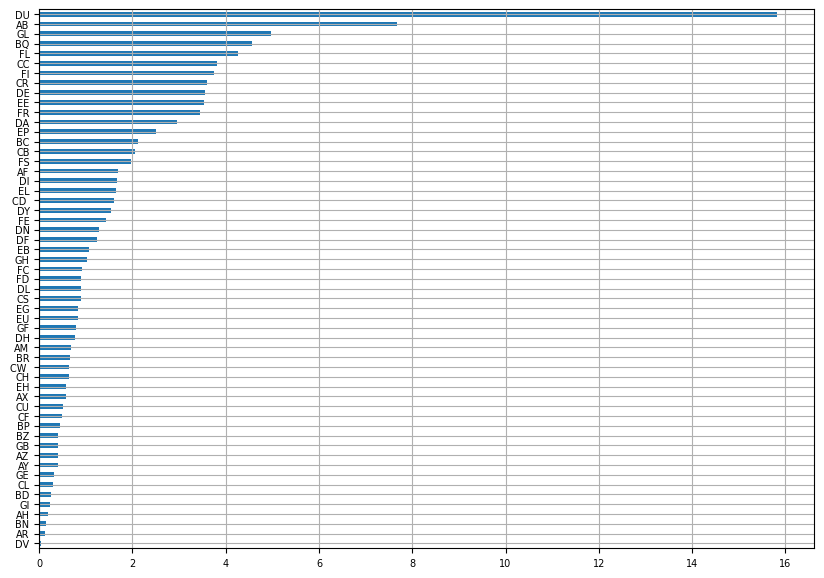

In [43]:
pd.DataFrame(data={'score': grid.best_estimator_.feature_importances_}, 
        index=X_train.columns).sort_values(by='score').plot(kind='barh', grid=True,
                                    figsize=(10,7), legend=False, fontsize=7);

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)
probs = model.predict_proba(X_valid)
log_loss(y_valid, probs)

0.2380763952188181

Now let's try to calibrate our models and look at the result. Let's look at their metrics and expected calibration errors.

In [45]:
def expected_calibration_error(y, proba, bins = 'fd'):
  import numpy as np
  bin_count, bin_edges = np.histogram(proba, bins = bins)
  n_bins = len(bin_count)
  bin_edges[0] -= 1e-8 # because left edge is not included
  bin_id = np.digitize(proba, bin_edges, right = True) - 1
  bin_ysum = np.bincount(bin_id, weights = y, minlength = n_bins)
  bin_probasum = np.bincount(bin_id, weights = proba, minlength = n_bins)
  bin_ymean = np.divide(bin_ysum, bin_count, out = np.zeros(n_bins), where = bin_count > 0)
  bin_probamean = np.divide(bin_probasum, bin_count, out = np.zeros(n_bins), where = bin_count > 0)
  ece = np.abs((bin_probamean - bin_ymean) * bin_count).sum() / len(proba)
  return ece

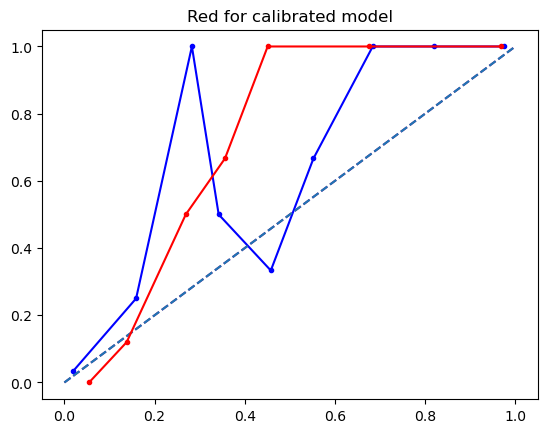

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)
probs = model.predict_proba(X_valid)
probs_1 = probs[:,1]
calibrator = CalibratedClassifierCV(model, cv=3)
calibrator.fit(X_train, y_train)
probs_calibr = calibrator.predict_proba(X_valid)
fop, mpv = calibration_curve(y_valid, probs_1, n_bins=10)
plt.plot([0, 1], [0, 1], linestyle='--', color='purple')
plt.plot(mpv, fop, marker='.', color='blue')
probs_calibr_1 = probs_calibr[:,1]
fop, mpv = calibration_curve(y_valid, probs_calibr_1, n_bins=10)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(mpv, fop, marker='.', color='red')
plt.title('Red for calibrated model')
plt.show()


In [47]:
print('expected_calibr_error:',
      round(expected_calibration_error(y_valid, probs_calibr_1), 2))

expected_calibr_error: 0.08


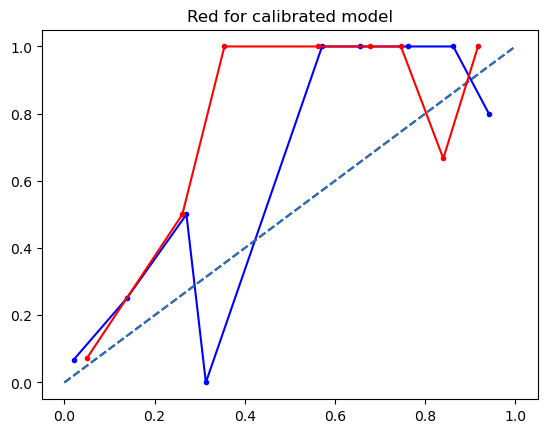

In [48]:
score = make_scorer(log_loss, greater_is_better=False)
model = LGBMClassifier(random_state=random_state, n_jobs=2)
parametrs = {'boosting_type': ['gbdt', 'dart'],
            'max_depth': [5, 10],
            'n_estimators': [100, 150, 200]}
grid = GridSearchCV(model, parametrs, scoring=score)
grid.fit(X_train, y_train)
probs = grid.best_estimator_.predict_proba(X_valid)
probs_1 = probs[:,1]
calibrator = CalibratedClassifierCV(model, cv=3)
calibrator.fit(X_train, y_train)
probs_calibr = calibrator.predict_proba(X_valid)
fop, mpv = calibration_curve(y_valid, probs_1, n_bins=10)
plt.plot([0, 1], [0, 1], linestyle='--', color='purple')
plt.plot(mpv, fop, marker='.', color='blue')
probs_calibr_1 = probs_calibr[:,1]
fop, mpv = calibration_curve(y_valid, probs_calibr_1, n_bins=10)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(mpv, fop, marker='.', color='red')
plt.title('Red for calibrated model')
plt.show()

In [49]:
print('expected_calibr_error:',
      round(expected_calibration_error(y_valid, probs_calibr_1), 2))

expected_calibr_error: 0.09


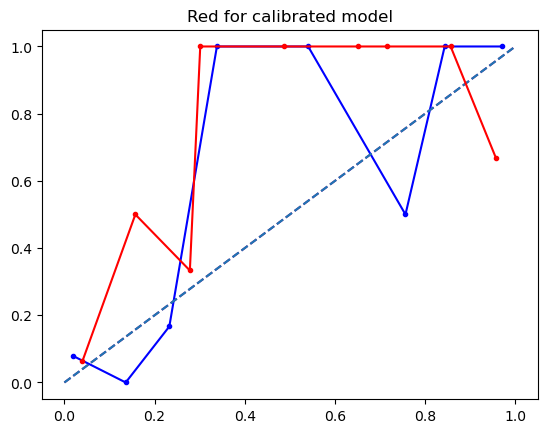

In [50]:
model = CatBoostClassifier(random_state=random_state, verbose=0)
parametrs = {'max_depth': [5, 10],
            'n_estimators': [10, 310]}
grid = GridSearchCV(model, parametrs, scoring=score)
grid.fit(X_train, y_train)
probs = grid.best_estimator_.predict_proba(X_valid)
probs_1 = probs[:,1]
calibrator = CalibratedClassifierCV(model, cv=3)
calibrator.fit(X_train, y_train)
probs_calibr = calibrator.predict_proba(X_valid)
fop, mpv = calibration_curve(y_valid, probs_1, n_bins=10)
plt.plot([0, 1], [0, 1], linestyle='--', color='purple')
plt.plot(mpv, fop, marker='.', color='blue')
probs_calibr_1 = probs_calibr[:,1]
fop, mpv = calibration_curve(y_valid, probs_calibr_1, n_bins=10)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(mpv, fop, marker='.', color='red')
plt.title('Red for calibrated model')
plt.show()

In [52]:
print('expected_calibr_error:',
      round(expected_calibration_error(y_valid, probs_calibr_1), 2))

expected_calibr_error: 0.1


In [53]:
data = data.dropna()
X = data.drop(['Id', 'Class', 'EJ'], axis=1)
scaler.fit(X)
col = scaler.get_feature_names_out(X.columns)
X_scaled = pd.DataFrame(scaler.transform(X), columns=col,
    index=X.index)
X = X_scaled

test = test.rename(columns={'BD ': 'BD', 'FD ': 'FD', })
X_test = test.drop(['Id', 'EJ'], axis=1)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=col,
    index=X_test.index)
X_test = X_test_scaled

In [54]:
model = CatBoostClassifier(random_state=random_state, verbose=0)
parametrs = {'max_depth': [5, 10],
            'n_estimators': [10, 310]}
grid = GridSearchCV(model, parametrs, scoring=score)
grid.fit(X, y)
calibrator = CalibratedClassifierCV(grid.best_estimator_, cv=3)
calibrator.fit(X, y)
probs = calibrator.predict_proba(X_test)


In [55]:
sub = pd.DataFrame()
sub['Id'] = test.Id    
sub['class_0'] = probs[:,0]
sub['class_1'] = probs[:,1]
sub

,Id,class_0,class_1
0,00eed32682bb,0.598701,0.401299
1,010ebe33f668,0.598701,0.401299
2,02fa521e1838,0.598701,0.401299
3,040e15f562a2,0.598701,0.401299
4,046e85c7cc7f,0.598701,0.401299
